In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [4]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [5]:
data.drop(['Customer','Effective To Date', 'Response', 'Vehicle Size','Policy','Number of Open Complaints' ],axis = 1,inplace = True)

In [6]:
data.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,7,Corporate Auto,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car


In [7]:
categorical = data.select_dtypes('object')

In [8]:
numerical = data._get_numeric_data()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for col in categorical.columns:
    categorical[col]=LabelEncoder().fit(categorical[col]).transform(categorical[col])

In [25]:
new = pd.concat([numerical, categorical], axis=1)

In [26]:
new.head().T

,0,1,2,3,4
Customer Lifetime Value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
Income,56274.000000,0.000000,48767.000000,0.000000,43836.000000
Monthly Premium Auto,69.000000,94.000000,108.000000,106.000000,73.000000
Months Since Last Claim,32.000000,13.000000,18.000000,18.000000,12.000000
Months Since Policy Inception,5.000000,42.000000,38.000000,65.000000,44.000000
Number of Policies,1.000000,8.000000,2.000000,7.000000,1.000000
Total Claim Amount,384.811147,1131.464935,566.472247,529.881344,138.130879
State,4.000000,0.000000,2.000000,1.000000,4.000000
Coverage,0.000000,1.000000,2.000000,0.000000,0.000000
Education,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
count = (new['Income'] == 0).sum()
print(count)


2317


In [28]:
new['Income'] = new['Income'].replace(0,new['Income'].mean())

In [29]:
count = (new['Income'] == 0).sum()
print(count)

0


In [31]:
new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class
0,2763.519279,56274.000000,69,32,5,1,384.811147,4,0,0,1,0,1,1,0,0,0,5
1,6979.535903,37657.380009,94,13,42,8,1131.464935,0,1,0,4,0,1,2,1,2,0,0
2,12887.431650,48767.000000,108,18,38,2,566.472247,2,2,0,1,0,1,1,1,0,0,5
3,7645.861827,37657.380009,106,18,65,7,529.881344,1,0,0,4,1,1,1,0,0,2,3
4,2813.692575,43836.000000,73,12,44,1,138.130879,4,0,0,1,1,0,2,1,0,0,0


In [17]:
#Try to improve the linear regression model.

<function matplotlib.pyplot.show(close=None, block=None)>

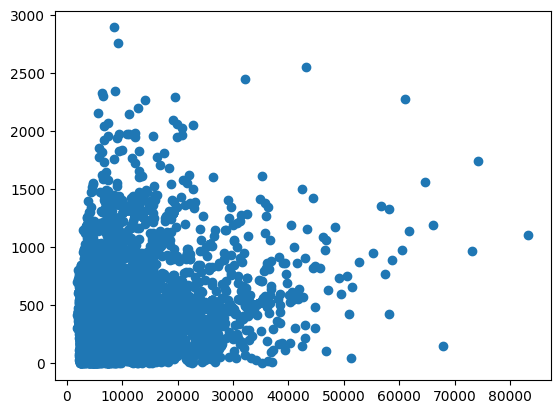

In [32]:
plt.scatter(new['Customer Lifetime Value'],x['Total Claim Amount'])
plt.show

In [33]:
X = new.drop(['Total Claim Amount'],axis = 1)
Y = new['Total Claim Amount']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [35]:
model = sm.OLS(y_train, X_train).fit()

In [36]:
predictions = model.predict(X_test)

In [37]:
r2_score(y_test, predictions)

0.5607945973516342